# Baseline Models

We will develop the baseline neural network model (one hidden layer, 3-node softmax output) for comparisons for later architectures.

In [90]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [66]:
# Reading in Data
data_path = 'data/merged.csv'
data = pd.read_csv(data_path)

In [67]:
# Function to convert data to classification
def label_type(row):
    """ Converts continuous label to categorical label
    """
    if row['scaled_effect'] < .95:
        return('Deleterious')
    elif row['scaled_effect'] > 1.05:
        return('Beneficial')
    else:
        return('Neutral')

In [68]:
# Change to classification
data['type'] = data.apply(lambda row: label_type(row), axis = 1)
data_final = data.drop(['scaled_effect'], axis=1)

In [98]:
# LOPO Splitting
def train_test_split(protein, curr_data):
    train_data = curr_data[curr_data.protein != protein].drop(['protein', 'pdb', 'resnum'], axis=1)
    test_data = curr_data[curr_data.protein == protein].drop(['protein', 'pdb', 'resnum'], axis=1)
    
    y_train = train_data.type
    encoder = LabelEncoder()
    encoder.fit(y_train)
    encoded_y_train = encoder.transform(y_train)
    y_train_oh = np_utils.to_categorical(encoded_y_train)
    
    scaler_train = StandardScaler()
    x_train = train_data.drop(['type'], axis=1)
    x_columns = x_train.columns
    x_train = scaler_train.fit_transform(x_train)
    x_train = pd.DataFrame(x_train, columns=x_columns)
    
    y_test = test_data.type
    encoder = LabelEncoder()
    encoder.fit(y_test)
    encoded_y_test = encoder.transform(y_test)
    y_test_oh = np_utils.to_categorical(encoded_y_test)
    
    scaler_test = StandardScaler()
    x_test = test_data.drop(['type'], axis=1)
    x_test = scaler_test.fit_transform(x_test)
    x_test = pd.DataFrame(x_test, columns=x_columns)

    return x_train, y_train_oh, x_test, y_test_oh

In [81]:
# Baseline Model
def baseline_model():
    model = Sequential()
    model.add(Dense(256, input_dim = 508, activation = 'relu', kernel_regularizer='l2'))
    model.add(Dense(3, activation='softmax'))
    opt = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return(model)

In [102]:
# Baseline Analysis
def baseline(protein):
    # Split Training Data based on Protein
    x_train, y_train, x_test, y_test = train_test_split(protein, data_final)
    
    # Build Model
    # 40 epochs based on initial runs and graphing of loss over time.
    estimator = KerasClassifier(build_fn=baseline_model, epochs=20, batch_size=64, verbose=1)
    estimator.fit(x_train, y_train, verbose=1)
    
    # Generate Analysis Characteristics
    probs = estimator.predict_proba(x_test)
    predictions = estimator.predict(x_test)
    precision = precision_score(np.argmax(y_test,1), predictions, average="macro", zero_division=0)
    score = estimator.score(x_test, y_test)

    print('Accuracy: {}'.format(score))
    print('Precision: {}'.format(precision))
    
    # Plotting Confusion Matrices
    cmatrix = confusion_matrix(np.argmax(y_test,1), predictions)
    fig, ax = plt.subplots()
    sns.heatmap(cmatrix, xticklabels = ['Beneficial', 'Deleterious', 'Neutral'], yticklabels = ['Beneficial', 'Deleterious', 'Neutral'])
    ax.set_title('{}'.format(protein))
    plt.savefig('img/baseline-cmatrix/' + protein + '-baseline-cmatrix.png', dpi=300)

Epoch 1/20
24441/24441 [==============================] - 1s 57us/step - loss: 1.7152 - accuracy: 0.6931
Epoch 2/20
24441/24441 [==============================] - 1s 53us/step - loss: 0.8000 - accuracy: 0.7103
Epoch 3/20
24441/24441 [==============================] - 1s 53us/step - loss: 0.7429 - accuracy: 0.7138
Epoch 4/20
24441/24441 [==============================] - 1s 53us/step - loss: 0.7322 - accuracy: 0.7144
Epoch 5/20
24441/24441 [==============================] - 1s 54us/step - loss: 0.7268 - accuracy: 0.7143
Epoch 6/20
24441/24441 [==============================] - 1s 53us/step - loss: 0.7209 - accuracy: 0.7193
Epoch 7/20
24441/24441 [==============================] - 1s 53us/step - loss: 0.7149 - accuracy: 0.7212
Epoch 8/20
24441/24441 [==============================] - 1s 54us/step - loss: 0.7082 - accuracy: 0.7242
Epoch 9/20
24441/24441 [==============================] - 1s 55us/step - loss: 0.7036 - accuracy: 0.7263
Epoch 10/20
24441/24441 [==============================

48005/48005 [==============================] - 3s 53us/step - loss: 0.7277 - accuracy: 0.7077
Epoch 12/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7296 - accuracy: 0.7047
Epoch 13/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7272 - accuracy: 0.7042
Epoch 14/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7233 - accuracy: 0.7077
Epoch 15/20
48005/48005 [==============================] - 3s 54us/step - loss: 0.7244 - accuracy: 0.7063
Epoch 16/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7226 - accuracy: 0.7056
Epoch 17/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7212 - accuracy: 0.7082
Epoch 18/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7212 - accuracy: 0.7077
Epoch 19/20
48005/48005 [==============================] - 3s 53us/step - loss: 0.7204 - accuracy: 0.7080
Epoch 20/20
1576/1576 [==============================] - 0

KeyboardInterrupt: 

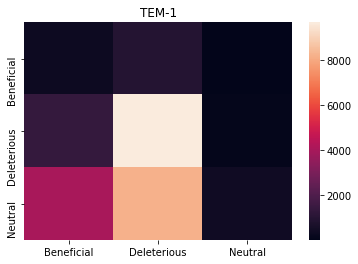

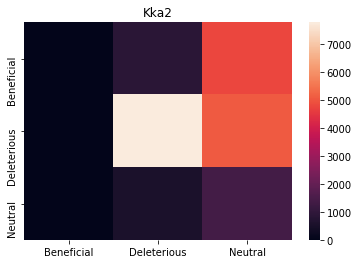

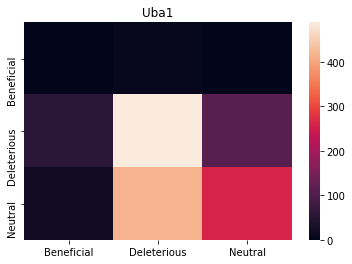

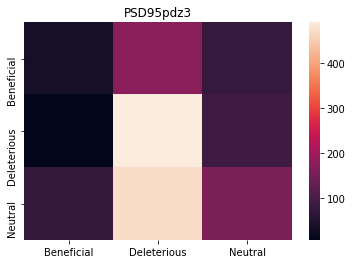

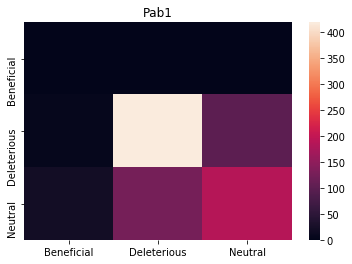

In [103]:
proteins = list(data_final['protein'].unique())
for protein in proteins:
    baseline(protein)